**PROJECT | GROUP 5**

**Oguzhan Ozbek | Raghav Dheer**

**Sheridan ID #991656424 | Sheridan ID<???????>**

**PROG39051 - Machine Learning Techniques**

**Professor El Sayed Mahmoud**

**2025-04-17**

In [ ]:
#IMPORTING PYTHON LIBRARIES AND UNDERSTANDING DATA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Motorvehicleinsurancedata.csv", delimiter=';')
df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190


In [2]:
#DATA CLEANING
print(f'Existince of NaN values: {df.isna().any().any()}')
print(df.isna().sum())

df = df.drop('ID', axis=1)
df = df.drop('Date_lapse', axis=1)
df = df.drop('Date_last_renewal', axis=1)
df = df.drop('Date_next_renewal', axis=1)
df_clean = df.dropna()

print('\nCleaning has been completed\n')
print(f'Existince of NaN values: {df_clean.isna().any().any()}')

Existince of NaN values: True
ID                          0
Date_start_contract         0
Date_last_renewal           0
Date_next_renewal           0
Date_birth                  0
Date_driving_licence        0
Distribution_channel        0
Seniority                   0
Policies_in_force           0
Max_policies                0
Max_products                0
Lapse                       0
Date_lapse              70408
Payment                     0
Premium                     0
Cost_claims_year            0
N_claims_year               0
N_claims_history            0
R_Claims_history            0
Type_risk                   0
Area                        0
Second_driver               0
Year_matriculation          0
Power                       0
Cylinder_capacity           0
Value_vehicle               0
N_doors                     0
Type_fuel                1764
Length                  10329
Weight                      0
dtype: int64

Cleaning has been completed

Existince of NaN values: Fa

In [3]:
#FEATURE EXTRACTION
df_clean['Date_birth'] = pd.to_datetime(df_clean['Date_birth'], format='%d/%m/%Y', errors='coerce')
today = pd.to_datetime("today")
df_clean['Age'] = (today - df_clean['Date_birth']).dt.days // 365

df_clean['Date_start_contract'] = pd.to_datetime(df_clean['Date_start_contract'], format='%d/%m/%Y', errors='coerce')
today = pd.to_datetime("today")
df_clean['Length_contract'] = (today - df_clean['Date_start_contract']).dt.days // 365

df_clean['Date_driving_licence'] = pd.to_datetime(df_clean['Date_driving_licence'], format='%d/%m/%Y', errors='coerce')
today = pd.to_datetime("today")
df_clean['Length_licence'] = (today - df_clean['Date_driving_licence']).dt.days // 365

df_clean = df_clean.drop('Date_birth', axis=1)
df_clean = df_clean.drop('Date_start_contract', axis=1)
df_clean = df_clean.drop('Date_driving_licence', axis=1)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95226 entries, 6 to 105554
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Distribution_channel  95226 non-null  int64  
 1   Seniority             95226 non-null  int64  
 2   Policies_in_force     95226 non-null  int64  
 3   Max_policies          95226 non-null  int64  
 4   Max_products          95226 non-null  int64  
 5   Lapse                 95226 non-null  int64  
 6   Payment               95226 non-null  int64  
 7   Premium               95226 non-null  float64
 8   Cost_claims_year      95226 non-null  float64
 9   N_claims_year         95226 non-null  int64  
 10  N_claims_history      95226 non-null  int64  
 11  R_Claims_history      95226 non-null  float64
 12  Type_risk             95226 non-null  int64  
 13  Area                  95226 non-null  int64  
 14  Second_driver         95226 non-null  int64  
 15  Year_matriculation    9

C:\Users\oguzh\AppData\Local\Temp\ipykernel_7804\1926060256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date_birth'] = pd.to_datetime(df_clean['Date_birth'], format='%d/%m/%Y', errors='coerce')
C:\Users\oguzh\AppData\Local\Temp\ipykernel_7804\1926060256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = (today - df_clean['Date_birth']).dt.days // 365
C:\Users\oguzh\AppData\Local\Temp\ipykernel_7804\1926060256.py:6: SettingWithCopyWarning: 
A value is trying to be set on 

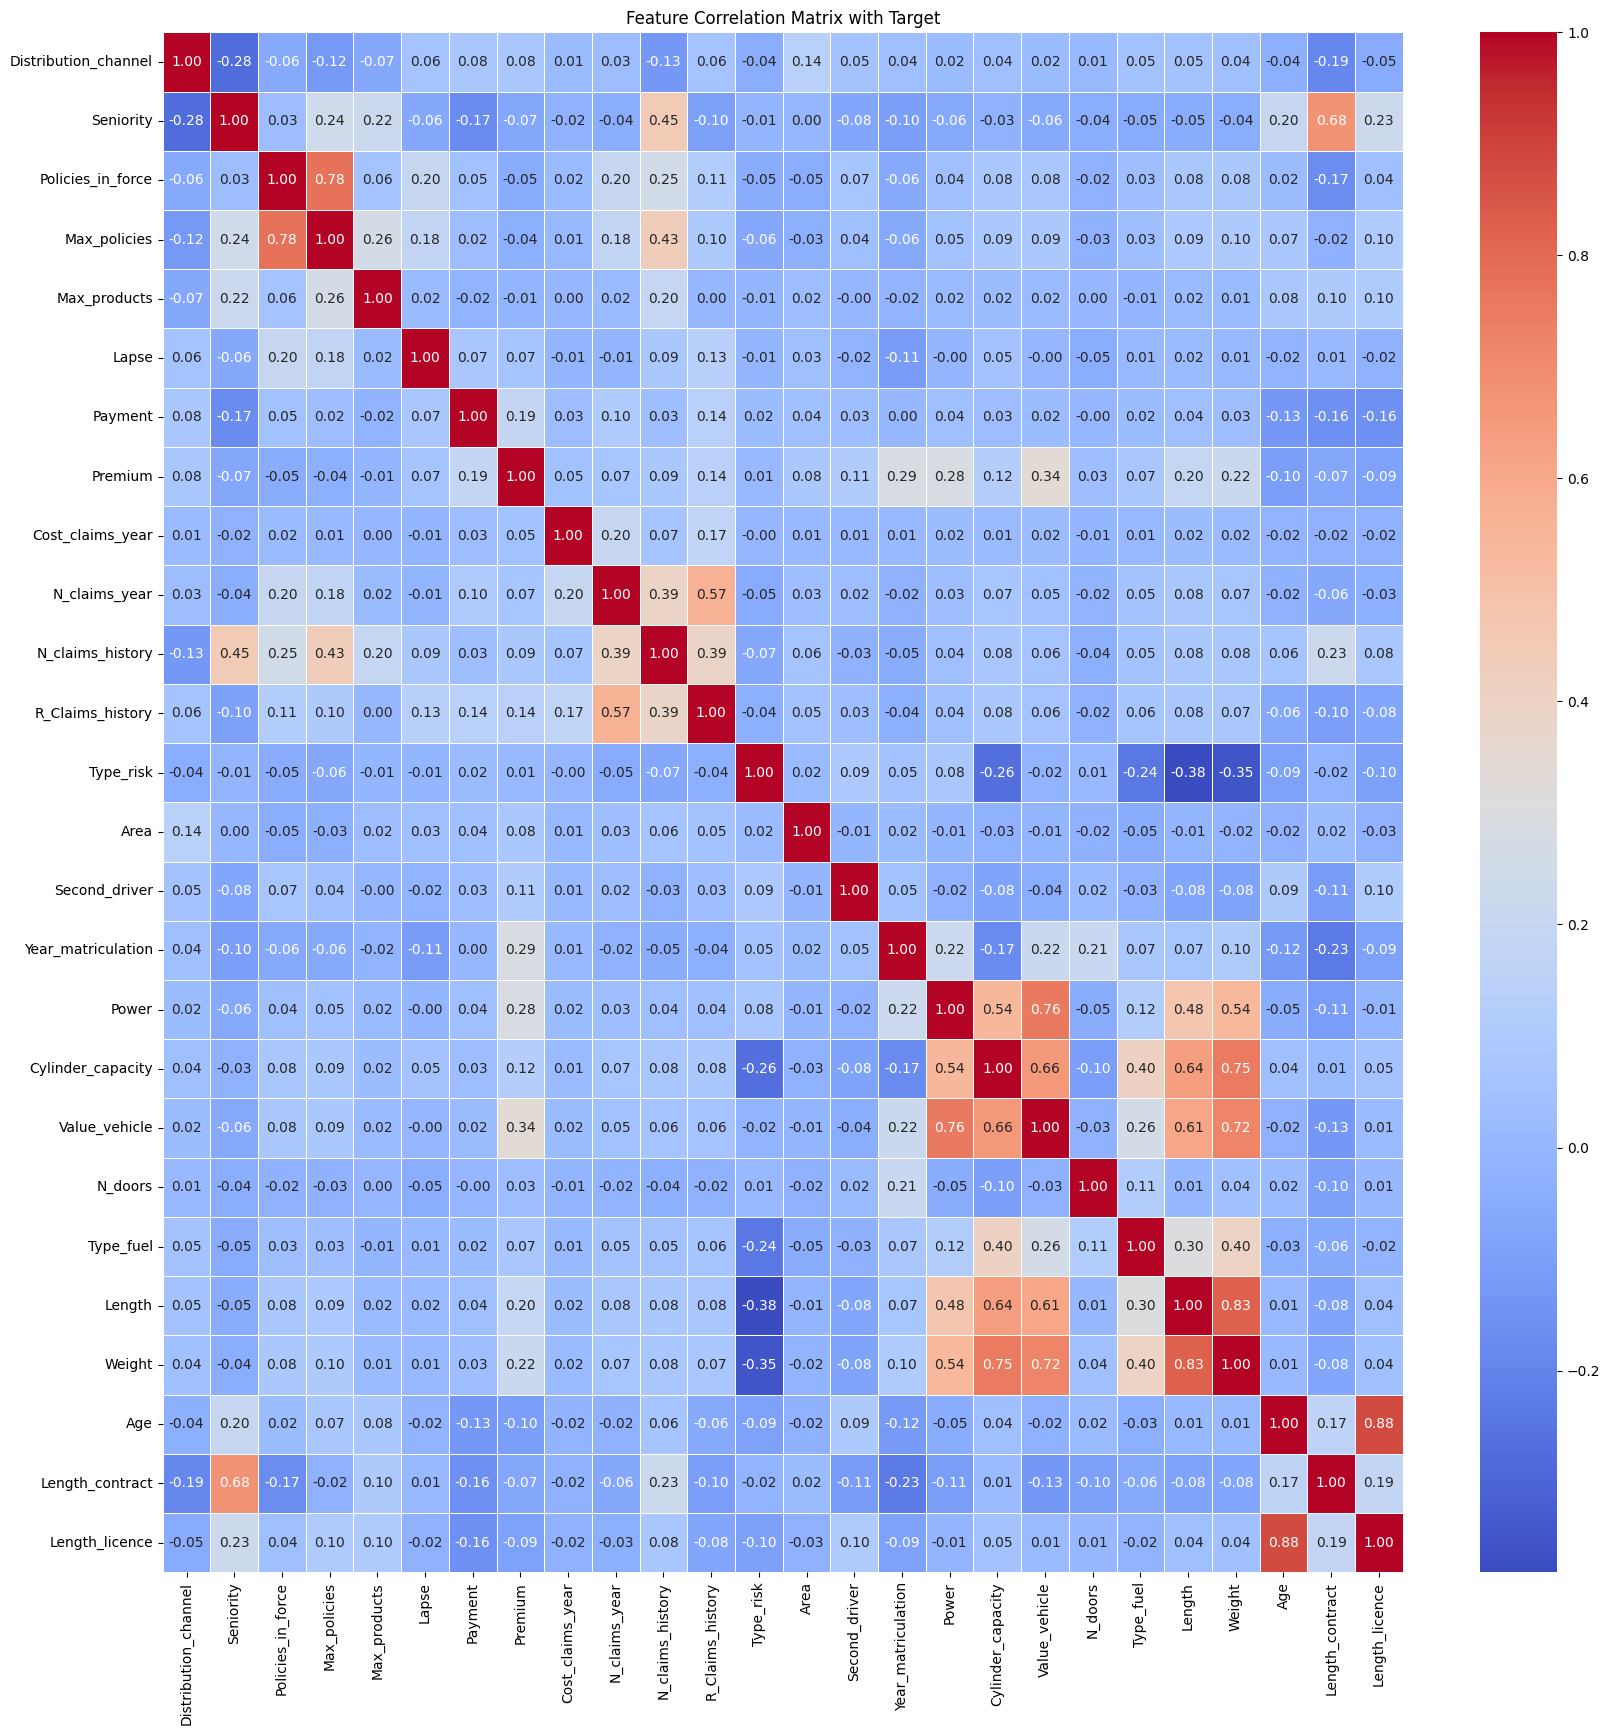

Premium               1.000000
Value_vehicle         0.340708
Year_matriculation    0.287014
Power                 0.282626
Weight                0.216801
Length                0.195998
Payment               0.187958
R_Claims_history      0.142677
Cylinder_capacity     0.123152
Second_driver         0.107512
Age                   0.100997
Name: Premium, dtype: float64

In [4]:
#LABEL ENCODING AND FEATURE SELECTION
df_clean['Type_fuel'] = df_clean['Type_fuel'].map({'P': 0, 'D': 1})
correlation_matrix = df_clean.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix with Target')
plt.show()
correlation_matrix['Premium'].abs().sort_values(ascending=False).head(11)

In [ ]:
features = [
    'Value_vehicle', 'Year_matriculation', 'Power', 'Weight', 'Length',
    'Payment', 'R_Claims_history', 'Cylinder_capacity', 'Second_driver', 'Age']

x = df_clean[features]
y = df_clean['Premium']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

